In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
dataset=pd.read_csv("pre-owned cars.csv")
dataset.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [59]:
dataset.isnull().sum()

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2086
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64

In [60]:
dataset.dtypes

brand                   object
model                   object
transmission            object
make_year              float64
reg_year                object
fuel_type               object
engine_capacity(CC)    float64
km_driven              float64
ownership               object
price                    int64
overall_cost           float64
has_insurance           object
spare_key               object
reg_number              object
title                   object
dtype: object

In [61]:
#filling all columns
for i in dataset.select_dtypes(include="object").columns:dataset[i].fillna(dataset[i].mode()[0],inplace=True)

In [62]:
for i in dataset.select_dtypes(include="float64").columns:dataset[i].fillna(dataset[i].mode()[0],inplace=True)

In [63]:
dataset.isnull().sum()

brand                  0
model                  0
transmission           0
make_year              0
reg_year               0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
reg_number             0
title                  0
dtype: int64

In [64]:
dataset.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2806.000000,2806.000000,2806.000000,2.806000e+03,2806.000000
mean,2018.180684,1256.419102,49207.775125,1.342522e+06,13493.021383
std,2.944852,249.405087,26625.312179,3.554669e+07,6040.662772
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1197.000000,28537.750000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45673.000000,5.940000e+05,12144.500000
75%,2021.000000,1451.000000,68177.750000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000


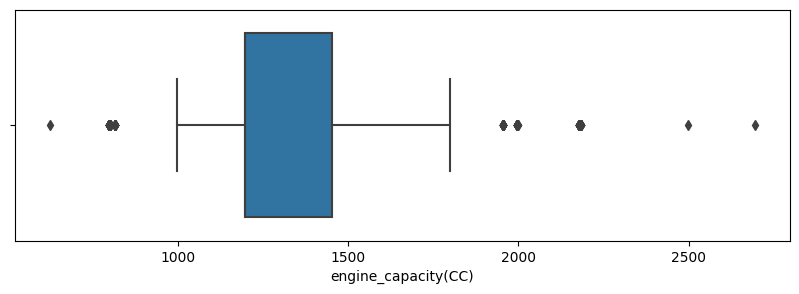

In [65]:
plt.figure(figsize=(10,3))
sns.boxplot(x="engine_capacity(CC)",data=dataset)
plt.show()

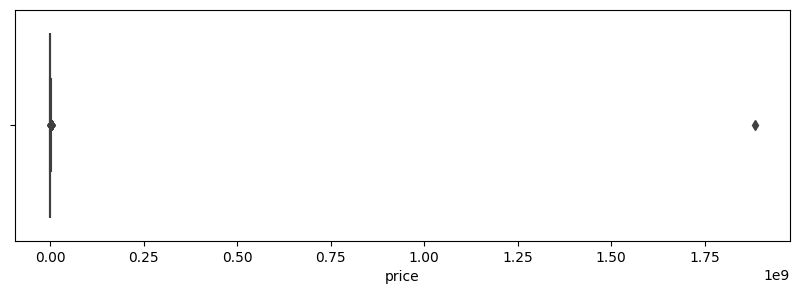

In [66]:
plt.figure(figsize=(10,3))
sns.boxplot(x="price",data=dataset)
plt.show()

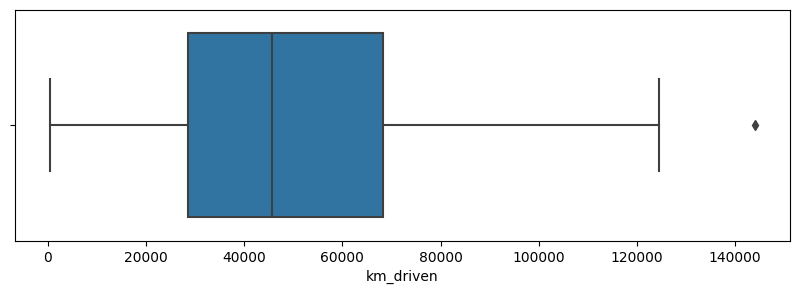

In [137]:
plt.figure(figsize=(10,3))
sns.boxplot(x="km_driven",data=dataset)
plt.show()

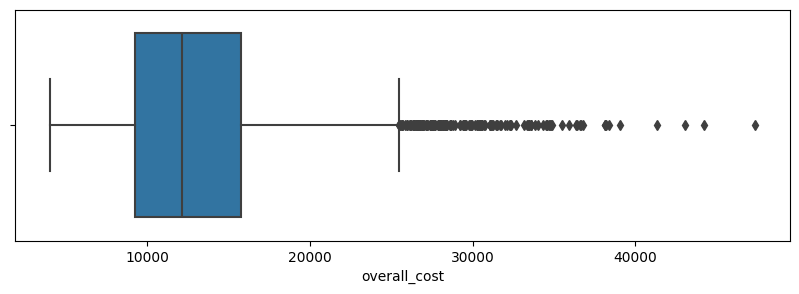

In [68]:
plt.figure(figsize=(10,3))
sns.boxplot(x="overall_cost",data=dataset)
plt.show()

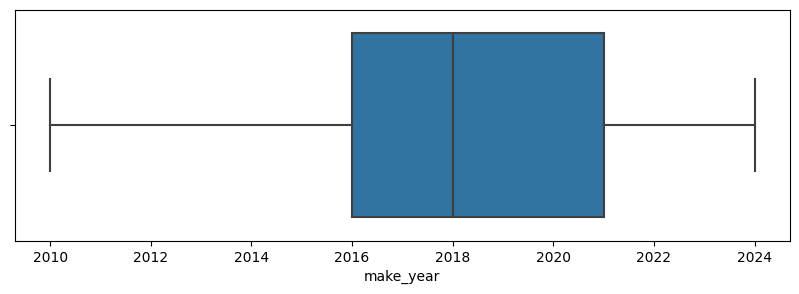

In [69]:
plt.figure(figsize=(10,3))
sns.boxplot(x="make_year",data=dataset)
plt.show()


In [70]:
q1=dataset["engine_capacity(CC)"].quantile(0.25)
q1

1197.0

In [71]:
q3=dataset["engine_capacity(CC)"].quantile(0.75)
q3

1451.0

In [72]:
iqr=q3-q1
iqr

254.0

In [73]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

In [74]:
new_dss=dataset[dataset["engine_capacity(CC)"]<=max_range]

In [75]:
 new_dss.shape

(2701, 15)

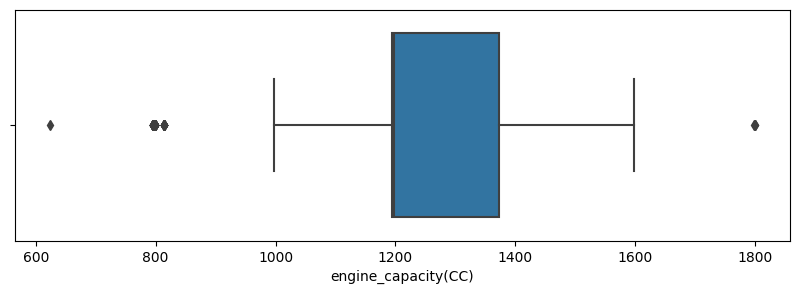

In [76]:
plt.figure(figsize=(10,3))
sns.boxplot(x="engine_capacity(CC)",data=new_dss)
plt.show()

In [77]:
a1=dataset["overall_cost"].quantile(0.25)
a1

9267.0

In [78]:
a3=dataset["overall_cost"].quantile(0.75)
a3

15760.0

In [79]:
iqr=a3-a1
iqr

6493.0

In [80]:
min_range=a1-(1.5*iqr)
max_range=a3+(1.5*iqr)

In [81]:
new_ds1=dataset[dataset["overall_cost"]<=max_range]

In [82]:
new_ds1.shape

(2638, 15)

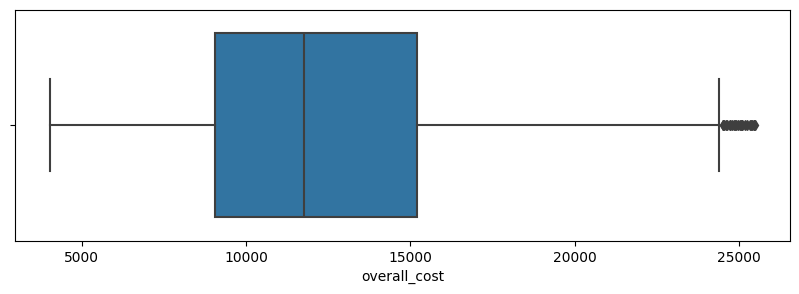

In [83]:
plt.figure(figsize=(10,3))
sns.boxplot(x="overall_cost",data=new_ds1)
plt.show()

In [84]:
b1=dataset["price"].quantile(0.25)
b1

435000.0

In [85]:
b3=dataset["price"].quantile(0.75)
b3

814000.0

In [86]:
iqr=b3-b1
iqr

379000.0

In [87]:
min_range=b1-(1.5*iqr)
max_range=b3+(1.5*iqr)

In [88]:
new_ds2=dataset[dataset["price"]<=max_range]

In [89]:
new_ds2.shape

(2663, 15)

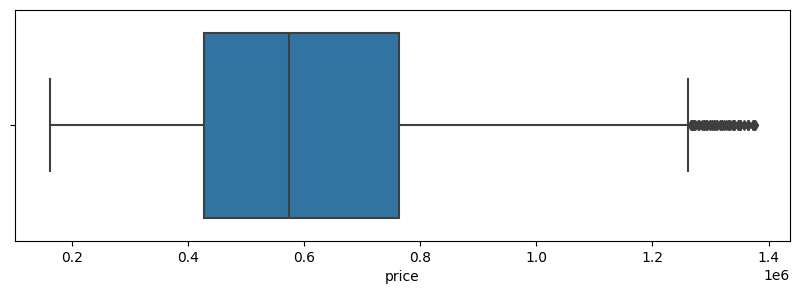

In [90]:
plt.figure(figsize=(10,3))
sns.boxplot(x="price",data=new_ds2)
plt.show()

In [91]:
c1=dataset["km_driven"].quantile(0.25)
c1

28537.75

In [92]:
c3=dataset["km_driven"].quantile(0.75)
c3

68177.75

In [93]:
iqr=c3-c1
iqr

39640.0

In [94]:
min_range=c1-(1.5*iqr)
max_range=c3+(1.5*iqr)

In [95]:
new_ds3=dataset[dataset["km_driven"]<=max_range]

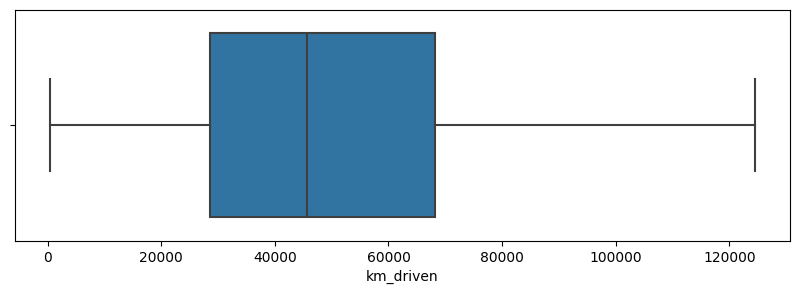

In [96]:
plt.figure(figsize=(10,3))
sns.boxplot(x="km_driven",data=new_ds3)
plt.show()

In [97]:
dataset.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2806.000000,2806.000000,2806.000000,2.806000e+03,2806.000000
mean,2018.180684,1256.419102,49207.775125,1.342522e+06,13493.021383
std,2.944852,249.405087,26625.312179,3.554669e+07,6040.662772
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1197.000000,28537.750000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45673.000000,5.940000e+05,12144.500000
75%,2021.000000,1451.000000,68177.750000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000


In [ ]:
dataset.head()

In [ ]:
dataset.head(10)

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
la=LabelEncoder()
la.fit(dataset["title"])
dataset["title"]=la.transform(dataset["title"])

In [106]:
la1=LabelEncoder()
la1.fit(dataset["model"])
dataset["models"]=la1.transform(dataset["model"])

In [107]:
dataset.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title,models
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,946,656
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,580,705
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,1389,324
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,1442,131
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,1038,212


In [108]:
dataset.drop(columns=["model"],inplace=True)

In [109]:
dataset.drop(columns=["title"],inplace=True)

In [110]:
la2=LabelEncoder()
la2.fit(dataset["transmission"])
dataset["transmissions"]=la2.transform(dataset["transmission"])

In [111]:
dataset.drop(columns=["transmission"],inplace=True)

In [ ]:
dataset.describe()

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
la3=LabelEncoder()
la3.fit(dataset["ownership"])
dataset["ownership"]=la3.transform(dataset["ownership"])

In [114]:
dataset.drop(dataset["ownership"],inplace=True)

In [115]:
la3=LabelEncoder()
la3.fit(dataset["brand"])
dataset["brand"]=la3.transform(dataset["brand"])

In [116]:
la3=LabelEncoder()
la3.fit(dataset["fuel_type"])
dataset["fuel_type"]=la3.transform(dataset["fuel_type"])

In [ ]:
#en_data=dataset[["has_insurance","spare_key"]]
p#d.get_dummies(en_data).info()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder(drop="first")
#ar=ohe.fit_transform(en_data).toarray()
#pd.DataFrame(ar,columns=["has_insurance"," spare_key_No"," spare_key_Yes"])

In [117]:
la3=LabelEncoder()
la3.fit(dataset["has_insurance"])
dataset["has_insurance"]=la3.transform(dataset["has_insurance"])

In [118]:
la3=LabelEncoder()
la3.fit(dataset["spare_key"])
dataset["spare_key"]=la3.transform(dataset["spare_key"])

In [119]:
dataset.head()

,brand,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,models,transmissions
3,2,2023.0,01-04-2023,3,1498.0,5061.0,0,1227000,23355.0,0,1,DL4C,131,0
4,1,2021.0,01-07-2021,1,1498.0,23480.0,0,887000,16883.0,0,0,UP14,212,1
5,2,2021.0,01-10-2021,3,1199.0,44787.0,0,796000,15561.0,0,0,UP32,736,1
6,12,2022.0,01-11-2022,3,1199.0,450.0,0,813000,15475.0,0,1,DL3C,482,1
7,12,2020.0,01-02-2021,1,1197.0,59866.0,0,728000,14228.0,0,0,DL5C,432,0


In [126]:
dataset.drop(columns=["reg_number"],inplace=True)

In [121]:
dataset.describe()


,brand,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,models,transmissions
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2.803000e+03,2803.000000,2803.0,2803.000000,2803.000000,2803.000000
mean,6.455583,2018.178737,2.655369,1255.719229,49222.650018,0.288263,1.342708e+06,13483.510168,0.0,0.268641,375.154121,0.686051
std,3.492074,2.945342,0.828879,248.490080,26624.655456,0.489389,3.556571e+07,6034.345782,0.0,0.443332,246.733966,0.464179
min,0.000000,2010.000000,0.000000,624.000000,450.000000,0.000000,1.630000e+05,4039.000000,0.0,0.000000,0.000000,0.000000
25%,3.000000,2016.000000,3.000000,1197.000000,28573.000000,0.000000,4.350000e+05,9266.500000,0.0,0.000000,141.000000,0.000000
50%,8.000000,2018.000000,3.000000,1197.000000,45695.000000,0.000000,5.940000e+05,12141.000000,0.0,0.000000,336.000000,1.000000
75%,8.000000,2021.000000,3.000000,1451.000000,68190.500000,1.000000,8.135000e+05,15753.000000,0.0,1.000000,608.000000,1.000000
max,14.000000,2024.000000,3.000000,2694.000000,143991.000000,2.000000,1.883558e+09,47338.000000,0.0,1.000000,817.000000,1.000000


In [ ]:
dataset.info()

In [136]:
dataset.head()

,brand,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,models,transmissions
3,2,2023.0,3,1498.0,5061.0,0,1227000,23355.0,0,1,131,0
4,1,2021.0,1,1498.0,23480.0,0,887000,16883.0,0,0,212,1
5,2,2021.0,3,1199.0,44787.0,0,796000,15561.0,0,0,736,1
6,12,2022.0,3,1199.0,450.0,0,813000,15475.0,0,1,482,1
7,12,2020.0,1,1197.0,59866.0,0,728000,14228.0,0,0,432,0


In [138]:
dataset.describe()

,brand,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,models,transmissions
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2.803000e+03,2803.000000,2803.0,2803.000000,2803.000000,2803.000000
mean,6.455583,2018.178737,2.655369,1255.719229,49222.650018,0.288263,1.342708e+06,13483.510168,0.0,0.268641,375.154121,0.686051
std,3.492074,2.945342,0.828879,248.490080,26624.655456,0.489389,3.556571e+07,6034.345782,0.0,0.443332,246.733966,0.464179
min,0.000000,2010.000000,0.000000,624.000000,450.000000,0.000000,1.630000e+05,4039.000000,0.0,0.000000,0.000000,0.000000
25%,3.000000,2016.000000,3.000000,1197.000000,28573.000000,0.000000,4.350000e+05,9266.500000,0.0,0.000000,141.000000,0.000000
50%,8.000000,2018.000000,3.000000,1197.000000,45695.000000,0.000000,5.940000e+05,12141.000000,0.0,0.000000,336.000000,1.000000
75%,8.000000,2021.000000,3.000000,1451.000000,68190.500000,1.000000,8.135000e+05,15753.000000,0.0,1.000000,608.000000,1.000000
max,14.000000,2024.000000,3.000000,2694.000000,143991.000000,2.000000,1.883558e+09,47338.000000,0.0,1.000000,817.000000,1.000000


C:\Users\Akash Mishra\AppData\Local\Temp\ipykernel_2652\509418274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["km_driven"])
c:\users\akash mishra\pycharmprojects\essen.tech.prat\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


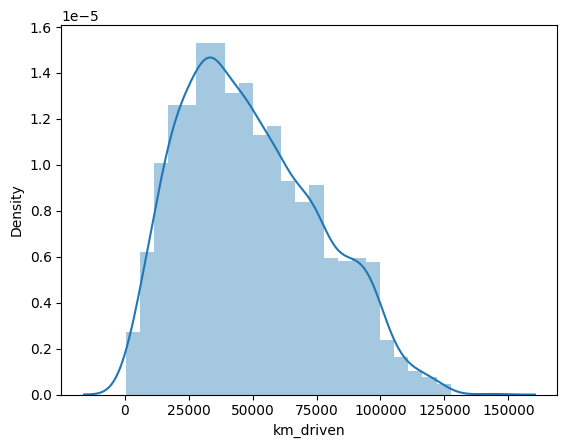

In [144]:
sns.distplot(dataset["km_driven"])
plt.show()

C:\Users\Akash Mishra\AppData\Local\Temp\ipykernel_2652\2039613667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["engine_capacity(CC)"])
c:\users\akash mishra\pycharmprojects\essen.tech.prat\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


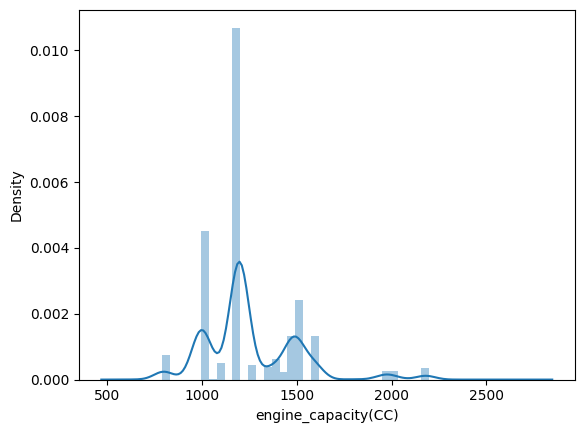

In [146]:
sns.distplot(dataset["engine_capacity(CC)"])
plt.show()

C:\Users\Akash Mishra\AppData\Local\Temp\ipykernel_2652\906807810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["overall_cost"])
c:\users\akash mishra\pycharmprojects\essen.tech.prat\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


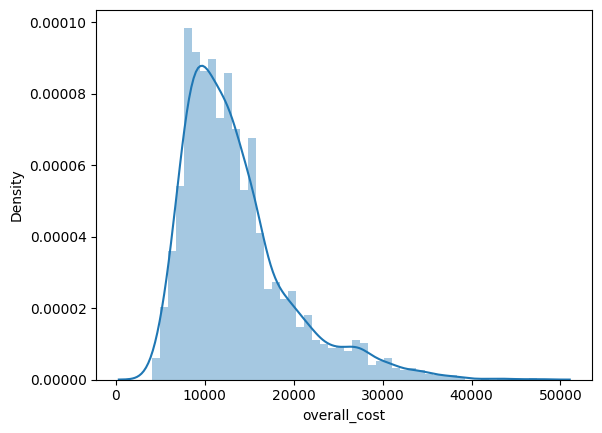

In [147]:
sns.distplot(dataset["overall_cost"])
plt.show()

In [149]:
from sklearn.preprocessing import StandardScaler

In [160]:
columns_to_scale=["engine_capacity(CC)","km_driven","overall_cost"]
ss=StandardScaler()
dataset["engine_capacity(CC)"]=ss.fit_transform(dataset[["engine_capacity(CC)"]])

In [161]:
ss=StandardScaler()
dataset["km_driven"]=ss.fit_transform(dataset[["km_driven"]])

In [162]:
ss=StandardScaler()
dataset["overall_cost"]=ss.fit_transform(dataset[["overall_cost"]])

In [163]:
dataset.head()

,brand,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,models,transmissions
3,2,2023.0,3,0.975186,-1.658971,0,1227000,1.636176,0,1,131,0
4,1,2021.0,1,0.975186,-0.967045,0,887000,0.563457,0,0,212,1
5,2,2021.0,3,-0.228296,-0.166629,0,796000,0.344339,0,0,736,1
6,12,2022.0,3,-0.228296,-1.832187,0,813000,0.330085,0,1,482,1
7,12,2020.0,1,-0.236346,0.399827,0,728000,0.123397,0,0,432,0


In [174]:
column_to_move="price"
last_position=len(dataset.columns)-1
columns=list(dataset.columns)
columns.remove(column_to_move)
columns.insert(last_position,column_to_move)
dataset=dataset[columns]

In [175]:
dataset.head(2)

,brand,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,overall_cost,has_insurance,spare_key,models,transmissions,price
3,2,2023.0,3,0.975186,-1.658971,0,1.636176,0,1,131,0,1227000
4,1,2021.0,1,0.975186,-0.967045,0,0.563457,0,0,212,1,887000


In [176]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [173]:
from sklearn.model_selection import train_test_split

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [179]:
from sklearn.linear_model import LinearRegression

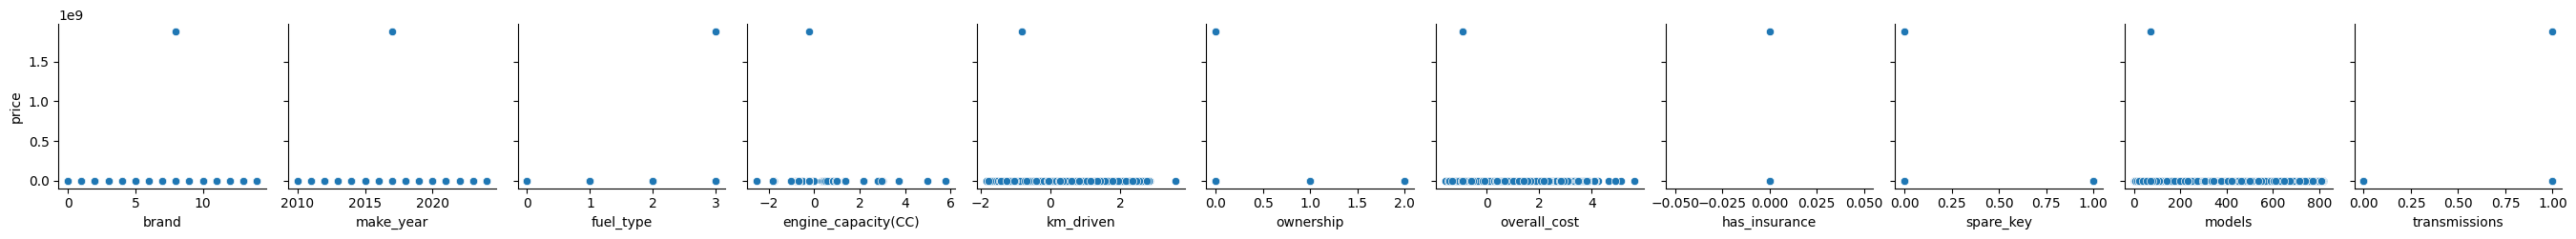

In [182]:
sns.pairplot(dataset,x_vars=x.columns,y_vars="price",kind="scatter")
plt.show()

c:\users\akash mishra\pycharmprojects\essen.tech.prat\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


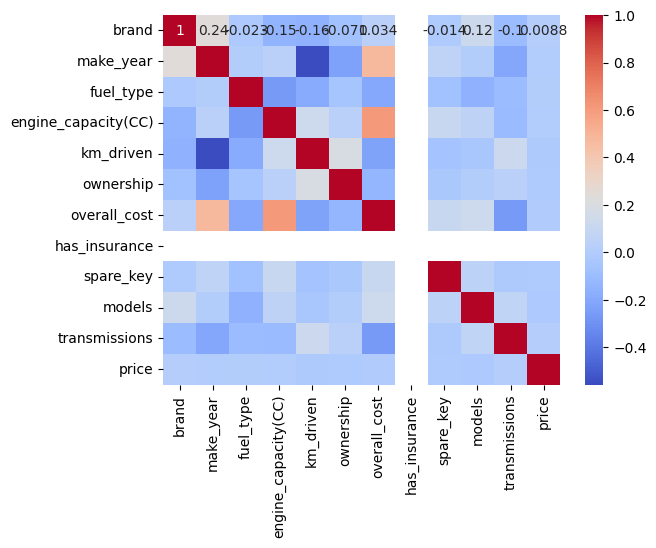

In [185]:
corr_matrix=dataset.corr()
sns.heatmap(corr_matrix,
            annot=True,cmap="coolwarm")
plt.show()